#plotting sigmoid function

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

$S_{w,b}(x)=\frac{1}{1+e^{-(w*x+b)}}$

In [0]:
a=[[1,2],[10,88]]

In [0]:
a[1][1]

88

In [0]:
b=[[1,2],[3,2]]

In [0]:
b.append([5,5])
b

[[1, 2], [3, 2], [5, 5]]

In [0]:
min(a)

[1, 2]

In [0]:
def sigmoid(w,x,b):
  return 1/(1+np.exp(-(w*x+b)))

In [0]:
sigmoid(1,1,0)

0.7310585786300049

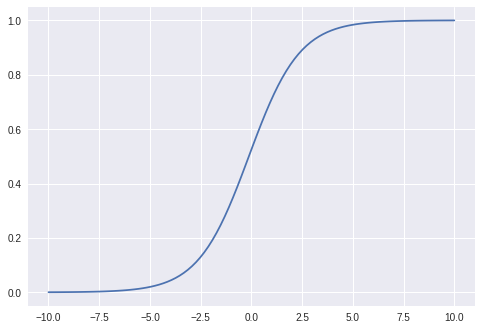

In [0]:
w=0.8 #@param {type: "slider", min:-2, max: 2,step:0.1}
b=0.1 #@param {type: "slider", min:-2, max: 2,step:0.1}
X=np.linspace(-10,10,100)
Y=sigmoid(w,X,b)
plt.plot(X,Y)
plt.show()

In [0]:
def sigmoid_2d(w1,w2,x1,x2,b):
  return 1/(1+np.exp(-((w1*x1+w2*x2+b))))

In [0]:
sigmoid_2d(0.5,0,1,0,0)

0.6224593312018546

In [0]:
from mpl_toolkits import mplot3d

In [0]:
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)

In [0]:
XX1,XX2=np.meshgrid(X1,X2)

In [0]:
W=[0.6,0,7]
X=[XX1,XX2]
Y=sigmoid_2d(0.6,0.7,XX1,XX2,0.8)

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

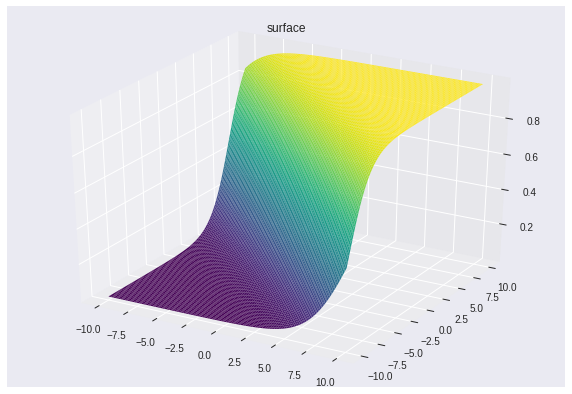

In [0]:
fig=plt.figure(figsize=(10,7))

ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_title('surface');

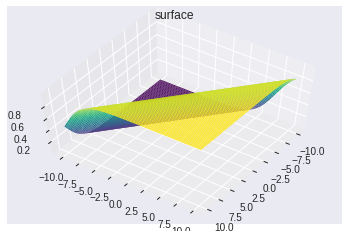

In [0]:
ax.view_init(60, 35)
fig


#com pute loss of gradient descent

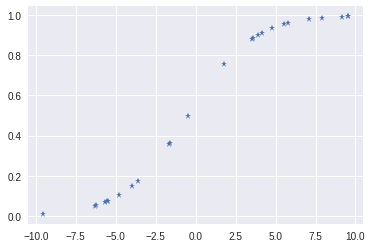

In [0]:
W_unk=0.5
B_unk=0.25
X=np.random.random(25)*20-10
Y=sigmoid(W_unk,X,B_unk)
plt.plot(X,Y,'*')
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [0]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

Text(0.5, 0, 'Loss')

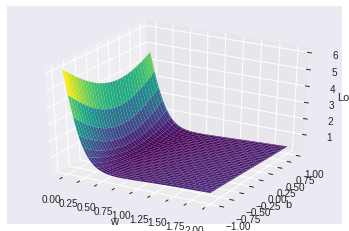

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

#ax.view_init(30, 30)

In [0]:
ij=np.argmin(Loss)
i=int(np.floor(ij/(Loss.shape[1])))
j=int(ij-i*Loss.shape[1])
print(WW[i,j],"-----",BB[i,j])

0.5 ----- 0.24


In [0]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [0]:
import matplotlib.colors

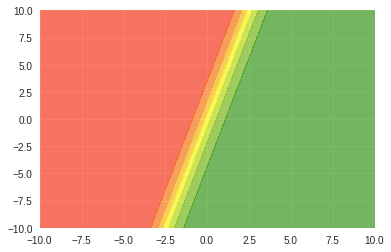

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

#class


In [0]:
def ininplot(ax):
  plot_sn(X,Y,sn,ax)
  

In [0]:
#!/usr/bin/python
# -*- coding: utf-8 -*-


class SigmoidNeuron:

    def __init__(self):
        self.w = None
        self.b = None

    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b

    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def predict(self, X):
      yp = []
      for x in X:
        ypt=(self.sigmoid(self.perceptron(x)))
        yp.append(ypt)
      return yp

    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x

    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)

    def fit(self,X,
        Y,
        epochs=1,
        learning_rate=1,
        initialise=True,
        do_plot=False,
        subplt=False
        ):

    # initialise w, b
        if do_plot:
            loss={}
            

        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dw = 0
            db = 0
            for (x, y) in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)
                if subplt:
                  self.w -= learning_rate * dw
                  self.b -= learning_rate * db
                  ininplot(ax)
                  
                
            self.w -= learning_rate * dw
            self.b -= learning_rate * db
            if do_plot:
              loss[i]=mean_squared_error(self.sigmoid(self.perceptron(X)),Y)
        if do_plot:
          plt.plot(loss.values())
          plt.xlabel('Epochs')
          plt.ylabel('Error')
          plt.show()

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [0]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [0]:
print(sn.w,sn.b)

In [0]:
def plot_sn(X,Y,sn,ax):
  X1=np.linspace(-10,10,100)
  X2=np.linspace(-10,10,100)
  XX1,XX2=np.meshgrid(X1,X2)
  YY=np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      YY[i,j]=sn.sigmoid(sn.perceptron(np.asarray([X1[j],X2[i]])))
  ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
  ax.plot()

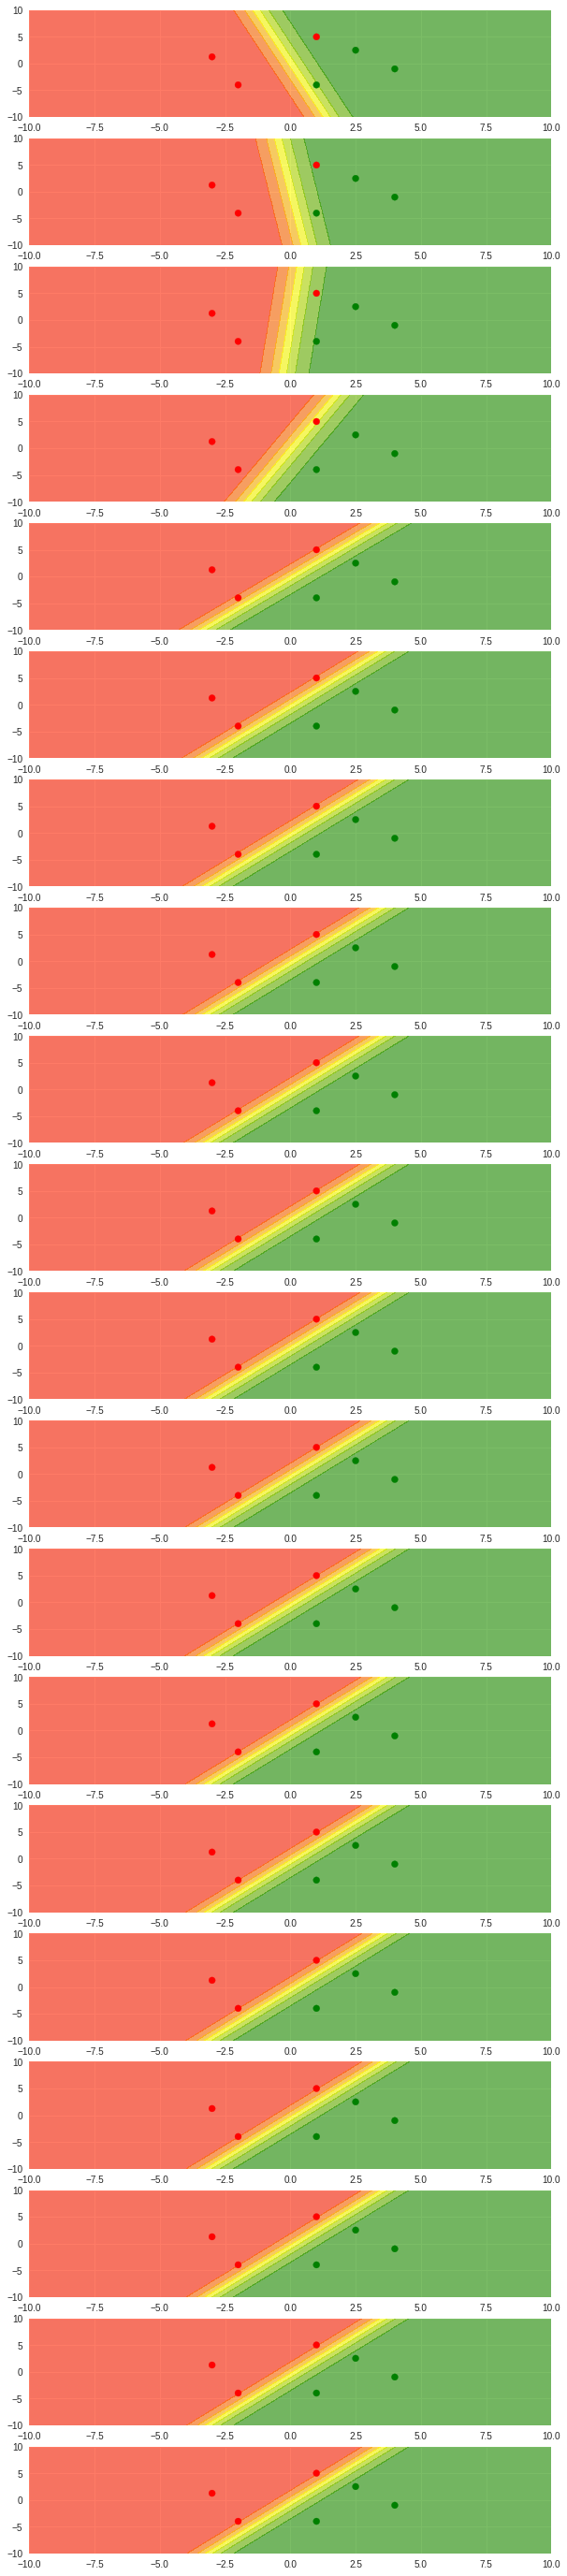

In [0]:
plt.figure(figsize=(10,20*5))
sn.fit(X,Y,1,0.005,True)
for i in range(20):
  #print(sn.w,sn.b)
  ax=plt.subplot(20,1,i+1)  
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,1,0.5,False)

In [0]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

#REal world


In [0]:
 #Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title mobile_cleaned-1551253091700.csv, id 18HPkxwXQ0BAv9xZ9n0xdCFJvTSJ0ys11
title train.csv, id 1jGhapJvHOmzIiv9V-gpJFukjQn6pOrxz
title train.csv.zip, id 1EuZvESjQS38YLoQYvP88g7MRceTtUIM4
title test (2).csv, id 1t9oTDuHE35L7SfhcW7jdmQ-7vc3q4NyQ
title NBA2.csv, id 1MaV2R1lMmZ-PACKIC_mz_xalz1946ZOh


In [0]:
file_id = '18HPkxwXQ0BAv9xZ9n0xdCFJvTSJ0ys11'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('NBA2.csv')
train=pd.read_csv('NBA2.csv',index_col=0)
train.head()

,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
PhoneId,,,,,,,,,,,,,,,,,,,,,
0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,...,0,0,0,0,1,0,0,0,1,4.5
1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,...,0,0,0,0,1,0,0,0,1,4.5
2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,...,0,0,0,0,1,0,0,0,1,4.4
4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,...,0,0,0,1,0,0,0,0,1,4.3
5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,...,0,0,0,0,1,0,0,0,1,4.4


In [0]:
X=train.drop('Rating',axis=1)
Y=train['Rating']

In [0]:
X.head()

,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,...,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
PhoneId,,,,,,,,,,,,,,,,,,,,,
0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,...,0,0,0,0,0,1,0,0,0,1
1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,...,0,0,0,0,0,1,0,0,0,1
2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,...,0,0,0,0,0,1,0,0,0,1
4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,...,0,0,0,0,1,0,0,0,0,1
5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,...,0,0,0,0,0,1,0,0,0,1


In [0]:
Y.head()

PhoneId
0    4.5
1    4.5
2    4.4
4    4.3
5    4.4
Name: Rating, dtype: float64

In [0]:
threshold=4.2
train['Class']=(train['Rating']>=threshold).astype(np.int)
#train['Class']

In [0]:
train['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_b=train['Class']

##Standardization

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn.preprocessing import  MinMaxScaler

In [0]:
scaler=StandardScaler()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,stratify=Y_b)

In [0]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [0]:
np.mean(X_test)

0.00017199276386470973

In [0]:
minmax_scaler = MinMaxScaler()

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [0]:
np.min(Y_scaled_train)

0.0

In [0]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [0]:
scaled_th=list(minmax_scaler.transform(np.array([threshold]).reshape(-1,1)))[0][0]
scaled_th

0.6800000000000002

In [0]:
Y_B_train=(Y_scaled_train>scaled_th).astype(np.int).ravel()
Y_B_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [0]:
Y_B_test=(Y_scaled_test>scaled_th).astype(np.int).ravel()
Y_B_test

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

#Training on Real Data

In [0]:
sn=SigmoidNeuron()

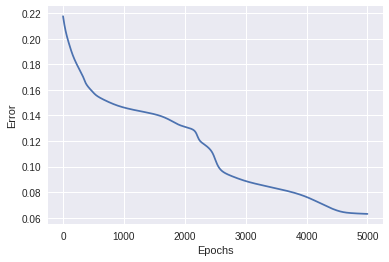

In [0]:
sn.fit(X_train,Y_scaled_train,epochs=5000,learning_rate=0.001,do_plot=True)

In [0]:
Y_pred_test=sn.predict(X_test)
Y_pred_train=sn.predict(X_train)

In [0]:
Y_pred_FINAL_test=(Y_pred_test>scaled_th).astype(np.int).ravel()
Y_pred_FINAL_train=(Y_pred_train>scaled_th).astype(np.int).ravel()

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
acc_test=accuracy_score(Y_pred_FINAL_test,Y_B_test)
acc_train=accuracy_score(Y_pred_FINAL_train,Y_B_train)
print(acc_train,"----",acc_test)

0.7647058823529411 ---- 0.813953488372093


##VISUALIZATION

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

fig=plt.figure(figsize=(10,7))
ax1 = plt.axes(projection='3d')
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
XX1,XX2=np.meshgrid(X1,X2)
YY=np.zeros(XX1.shape)

